In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
data = np.load('./datasets/mnist_train_small.npy')

In [3]:
data.shape

(19999, 785)

In [4]:
X = data[:, 1:]
y = data[:, 0]

In [5]:
X.shape, y.shape

((19999, 784), (19999,))

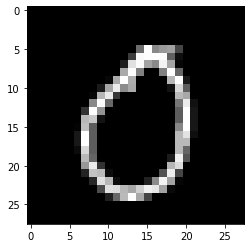

In [6]:
plt.imshow(X[56].reshape(28, 28), cmap='gray')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [8]:
class CustomKNN:
    def __init__(self, n_neighbours=5):
        self.n_neighbours = n_neighbours
    
    def fit(self, X, y):
        self.X = (X - X.mean()) / X.std()
        self.y = y
    
    def predict_point(self, point):
        # take distance of this point from every point in training set (X) and compare with y
        # distance store karo, also store cluster value 
        distances = []
        
        for Xd, yd in zip(self.X, self.y):
            distance = np.sum((Xd-point)**2)
            distances.append([distance, yd])
        
        top_k = sorted(distances)[:self.n_neighbours]
        ans, counts = np.unique(np.array(top_k)[:, 1], return_counts=True)
        max_index = np.argmax(counts)
        return ans[max_index]
    
    def predict(self, X):
        X = (X - X.mean()) / X.std()
        results = []
        for point in X:
            results.append(self.predict_point(point))
        return np.array(results)
        
    def score(self, X, y):
        return (self.predict(X)==y).mean()

In [9]:
model = CustomKNN()

In [10]:
model.fit(X_train, y_train)

In [11]:
model.predict(X_test[:10])

array([1., 7., 0., 9., 4., 5., 4., 6., 9., 2.])

In [12]:
y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [13]:
model.score(X_test[:100], y_test[:100])

0.95

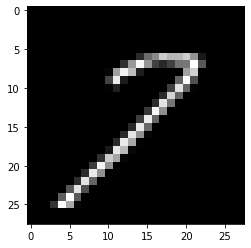

In [91]:
plt.imshow(X_test[0].reshape(28, 28), cmap='gray')

In [92]:
a = np.array([0,1,1,1,1,1,1,1,1,0,0, 2,2, 2, 2, 2])
ans, counts = np.unique(a, return_counts=True)
print(ans, counts)
np.argmax(counts)

[0 1 2] [3 8 5]


1